In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import requests

def get_state_info(state):
    state_info = requests.get('https://covidtracking.com/api/v1/states/{}/info.json'.format(state)).json()
    return state_info

def get_state_links(state):
    state_info = get_state_info(state)
    state_links = ['{}: {}'.format(k,v) for k,v in state_info.items() if k.startswith('covid')]
    return '\n'.join(state_links)
    
def get_state_notes(state):
    state_info = get_state_info(state)
    return state_info['notes'].replace('\n','\n\n')

state = 'ny'
print(get_state_notes(state), '\n')
print(get_state_links(state))


Numbers come from [press conference](https://www.governor.ny.gov). 

Recovered = discharged. As of April 27, New York is reporting people tested. Cumulative hospitalized and recovered are calculated using the 3 day average change in hospitalization benchmarked from April 12.

There is a significant gap between deaths reported by New York City and New York State. As of 6/1, the difference between the state reported deaths, which we use, and the NYC deaths was 5740 

covid19Site: https://coronavirus.health.ny.gov/county-county-breakdown-positive-cases
covid19SiteSecondary: https://covid19tracker.health.ny.gov/views/NYS-COVID19-Tracker/NYSDOHCOVID-19Tracker-Fatalities?%3Aembed=yes&%3Atoolbar=no&%3Atabs=n
covid19SiteTertiary: https://www.governor.ny.gov/news/governor-cuomo-updates-new-yorkers-states-progress-during-covid-19-pandemic
covid19SiteOld: https://www.health.ny.gov/diseases/communicable/coronavirus/


In [19]:
def parse_date(date):
    date_str = str(date)
    year, month, day = date_str[:4], date_str[4:6], date_str[6:8]
    date_time_str = '-'.join([year, month, day])
    dt = datetime.strptime(date_time_str, '%Y-%m-%d')
    return dt.date()

def get_state_current(state):
    state_current = requests.get('https://covidtracking.com/api/v1/states/{}/current.json'.format(state)).json()
    state_current['date'] = parse_date(state_current['date'])
    return state_current

def get_state_current_df(state):
    state_current_df = pd.DataFrame([get_state_current(state)]).T.reset_index()
    state_current_df.columns = ['name', 'value']
    return state_current_df

state = 'fl'
get_state_current_df(state)

,name,value
0,date,2020-07-17
1,state,FL
2,positive,327241
3,negative,2553527
4,pending,2250
5,hospitalizedCurrently,8961
6,hospitalizedCumulative,20526
7,inIcuCurrently,None
8,inIcuCumulative,None
9,onVentilatorCurrently,None


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-07-17,NY,405551,4593898,NaN,765.0,89995.0,179.0,None,98.0,...,4999449,10,0,93be3084132a637e27a0b5aa58c719d4cca41c4a,0,0,0,0,0,
1,2020-07-16,NY,404775,4516435,NaN,813.0,89995.0,165.0,None,88.0,...,4921210,11,0,9786472ba197a40425272e3db3407b63d877c569,0,0,0,0,0,
2,2020-07-15,NY,404006,4444519,NaN,831.0,89995.0,165.0,None,94.0,...,4848525,9,0,9af4f32d18a62e64db69b0e10dbdb1e48e2f99fd,0,0,0,0,0,
3,2020-07-14,NY,403175,4381752,NaN,820.0,89995.0,167.0,None,101.0,...,4784927,5,0,122b978ca96390b17659258417e51aa2611fae4d,0,0,0,0,0,
4,2020-07-13,NY,402263,4322619,NaN,792.0,89995.0,175.0,None,103.0,...,4724882,10,0,5b0bd7c8b5855c24fb40aa7b54d82106c3a66927,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020-03-08,NY,105,92,NaN,NaN,NaN,NaN,None,NaN,...,197,0,0,fa2a693c8e7c1123ce6741af19746db86f9d8fce,0,0,0,0,0,
132,2020-03-07,NY,76,92,236.0,NaN,NaN,NaN,None,NaN,...,168,0,0,0fc0bcee0b931ade7d5379ba6ea1bbcbac513630,0,0,0,0,0,
133,2020-03-06,NY,33,92,236.0,NaN,NaN,NaN,None,NaN,...,125,0,0,6f6a5ab226e7632b2d5bda9d6acc6cbe9e29cd7e,0,0,0,0,0,
134,2020-03-05,NY,22,76,24.0,NaN,NaN,NaN,None,NaN,...,98,0,0,24af0f3d698331d8a3896c0f921342be3b0817c0,0,0,0,0,0,


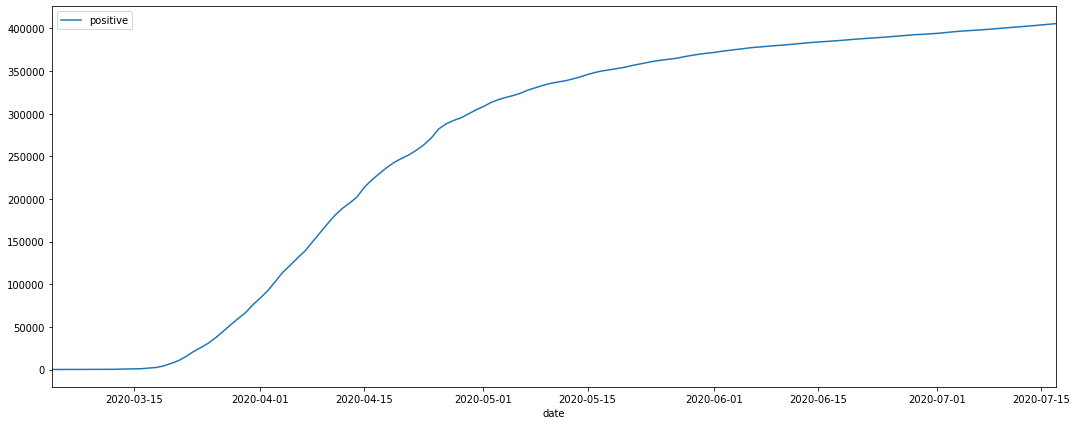

In [21]:
def get_state_history(state):
    state_history = requests.get('https://covidtracking.com/api/v1/states/{}/daily.json'.format(state)).json()
    for i in range(len(state_history)):
        state_history[i]['date'] = parse_date(state_history[i]['date'])
    return state_history

state = 'ny'
ny_history = pd.DataFrame(get_state_history(state))#.set_index('date')
# ny_history = ny_history.loc['2020-05-01']
display(ny_history)
ny_history[['date' ,'positive']].set_index('date').plot(y='positive', figsize=(18,7))

In [4]:
def filter_date_range(df, start, end):
    start = datetime.strptime(start, '%Y-%m-%d').date() - timedelta(days=1)
    end = datetime.strptime(end, '%Y-%m-%d').date() + timedelta(days=1)
    mask = start < df['date'] 
    df = df[mask]
    mask = end > df['date'] 
    return df[mask]
filter_date_range(ny_history, '2020-06-25', '2020-07-16')
# ny_history['date'] > datetime.strptime('2020-06-25', '%Y-%m-%d').date()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-07-15,FL,301810,2434143,2189.0,8217.0,19659.0,None,None,None,...,2735953,112,458,bc699066264e0abd47dad2a14d171c4f3475f444,0,0,0,0,0,
1,2020-07-14,FL,291629,2393614,387.0,8354.0,19201.0,None,None,None,...,2685243,133,384,ec87991f419df2b036bfed016c20e784ab6e9633,0,0,0,0,0,
2,2020-07-13,FL,282435,2357139,1995.0,8051.0,18817.0,None,None,None,...,2639574,35,227,74560c943331b1aeccacce7e12f45f8b46f85b9b,0,0,0,0,0,
3,2020-07-12,FL,269811,2304196,2096.0,7542.0,18590.0,None,None,None,...,2574007,45,249,96515a7400523e848fb71974057685236cfb0a25,0,0,0,0,0,
4,2020-07-11,FL,254511,2220788,2040.0,7186.0,18341.0,None,None,None,...,2475299,98,425,e3bf4ef7e8bc4b1cb2a732855ffb8125bdbd77bf,0,0,0,0,0,
5,2020-07-10,FL,244151,2177476,1911.0,6974.0,17916.0,None,None,None,...,2421627,92,437,3968c03124ccdd661df0cc1695af0e15560f692c,0,0,0,0,0,
6,2020-07-09,FL,232718,2124680,1896.0,NaN,17479.0,None,None,None,...,2357398,120,411,8835e7aff9c290e87f7bb49d6f08913a7aa2c191,0,0,0,0,0,
7,2020-07-08,FL,223783,2096424,1773.0,NaN,17068.0,None,None,None,...,2320207,48,335,aaf2c5d2f742f5e1754ba154992b5e1a359d00b8,0,0,0,0,0,
8,2020-07-07,FL,213794,2055400,1604.0,NaN,16733.0,None,None,None,...,2269194,63,381,001ee95df3d0e017d1e9969817494288f6e56a6c,0,0,0,0,0,
9,2020-07-06,FL,206447,2027493,1516.0,NaN,16352.0,None,None,None,...,2233940,48,151,e27c2f63ba1efdc2dfc9843d3ffe43560fd4c4fd,0,0,0,0,0,


In [5]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash
import dash_table

app = JupyterDash(__name__)
app.layout = html.Div([
    html.Label([
        "State",
        dcc.Dropdown(
            id='State', clearable=False,
            value='ny', options=[
                {'label': c, 'value': c}
                for c in ['ny', 'fl', 'ca', 'nj']
            ])
    ]),
    html.Br(),
    dcc.Textarea(
        id='Notes',
        value=get_state_notes('ny'),
        style={'width': '100%', 'height':'200px'}
    ),
    dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in get_state_current_df('ny').columns],
        data=get_state_current_df('ny').to_dict('records'),
    ),
])

@app.callback(
    Output('table', 'data'),
     [Input("State", "value"),]
)
def update_table(state):
    return get_state_current_df(state).to_dict('records')
@app.callback(
    Output('Notes', 'value'),
     [Input("State", "value"),]
)
def update_notes(state):
    return get_state_notes(state)



app.run_server(mode='inline')

